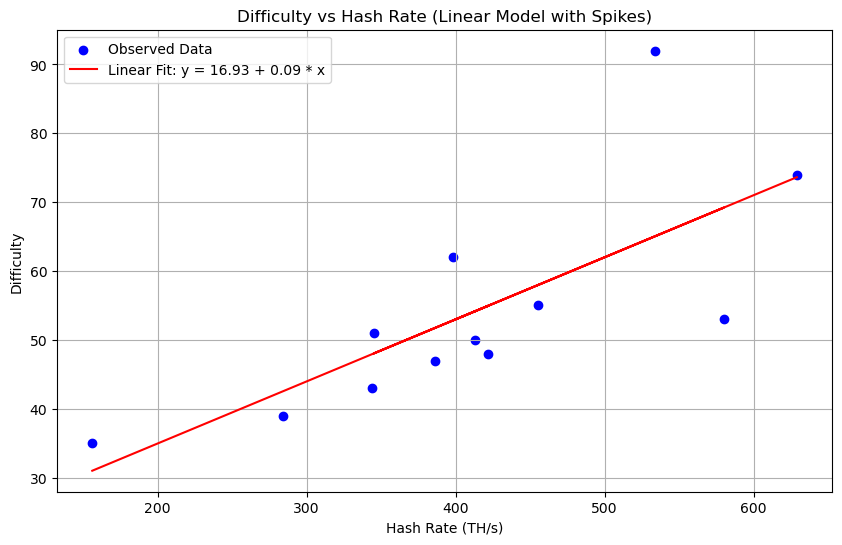

Model Intercept: 16.93
Model Coefficient (Slope): 0.09
Predicted Difficulty for Hash Rate 4500 TH/s: 422.55


C:\Users\Venkatesan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

# Simulated data with trend and spikes
data = {
    'Time (Months)': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Hash Rate (TH/s)': [156,284,344,386,422,345,413,455,580,398,534,629],
    'Difficulty': [35,39,43,47,48,51,50,55,53,62,92,74]
}
# Convert data to pandas DataFrame
df = pd.DataFrame(data)

# Extracting Hash Rate (X) and Difficulty (y)
X = df[['Hash Rate (TH/s)']]  # Predictor variable (Hash Rate)
y = df['Difficulty']          # Response variable (Difficulty)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plotting the data and the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(df['Hash Rate (TH/s)'], df['Difficulty'], color='blue', label='Observed Data')
plt.plot(df['Hash Rate (TH/s)'], y_pred, color='red', label=f'Linear Fit: y = {model.intercept_:.2f} + {model.coef_[0]:.2f} * x')
plt.xlabel('Hash Rate (TH/s)')
plt.ylabel('Difficulty')
plt.title('Difficulty vs Hash Rate (Linear Model with Spikes)')
plt.legend()
plt.grid(True)
plt.show()

# Display the model's intercept and coefficient
print(f"Model Intercept: {model.intercept_:.2f}")
print(f"Model Coefficient (Slope): {model.coef_[0]:.2f}")

# Predict the next point
next_hash_rate = np.array([[4500]])  # Extend the trend with the next hash rate value
next_difficulty = model.predict(next_hash_rate)

print(f"Predicted Difficulty for Hash Rate {next_hash_rate[0][0]} TH/s: {next_difficulty[0]:.2f}")




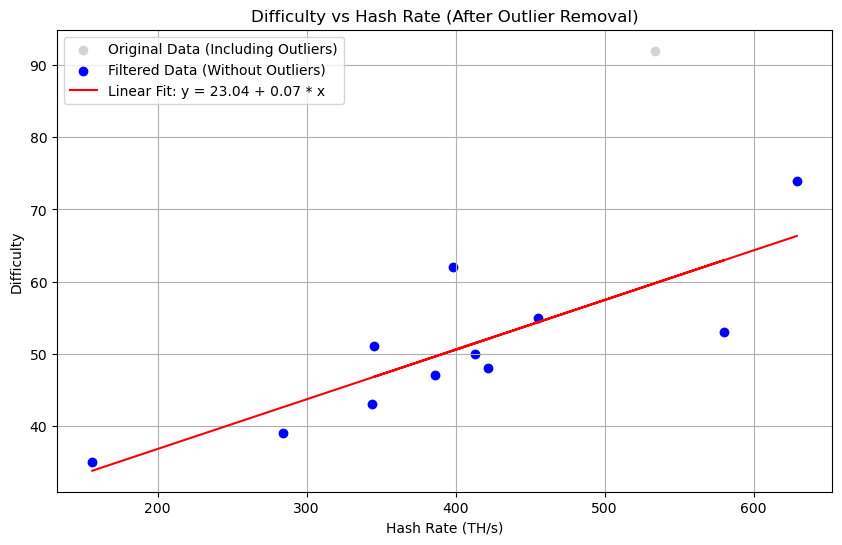

Outliers detected:
    Time (Months)  Hash Rate (TH/s)  Difficulty  Z_Score_Difficulty  \
10             11               534          92            2.515271   

    Z_Score_HashRate  
10          0.983755  
Model Intercept: 23.04
Model Coefficient (Slope): 0.07
Predicted Difficulty for Hash Rate 4500 TH/s: 332.68


C:\Users\Venkatesan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore

# Simulated data with trend and spikes
data = {
    'Time (Months)': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Hash Rate (TH/s)': [156,284,344,386,422,345,413,455,580,398,534,629],
    'Difficulty': [35,39,43,47,48,51,50,55,53,62,92,74]
}
# Convert data to pandas DataFrame
df = pd.DataFrame(data)

# Detect outliers using Z-score
df['Z_Score_Difficulty'] = zscore(df['Difficulty'])
df['Z_Score_HashRate'] = zscore(df['Hash Rate (TH/s)'])

# Set a Z-score threshold (e.g., |Z| > 2.5 indicates outliers)
threshold = 2.5
filtered_df = df[(df['Z_Score_Difficulty'].abs() <= threshold) & (df['Z_Score_HashRate'].abs() <= threshold)]

# Extract Hash Rate (X) and Difficulty (y) from filtered data
X = filtered_df[['Hash Rate (TH/s)']]  # Predictor variable (Hash Rate)
y = filtered_df['Difficulty']         # Response variable (Difficulty)

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plotting the data and the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(df['Hash Rate (TH/s)'], df['Difficulty'], color='lightgray', label='Original Data (Including Outliers)')
plt.scatter(filtered_df['Hash Rate (TH/s)'], filtered_df['Difficulty'], color='blue', label='Filtered Data (Without Outliers)')
plt.plot(filtered_df['Hash Rate (TH/s)'], y_pred, color='red', label=f'Linear Fit: y = {model.intercept_:.2f} + {model.coef_[0]:.2f} * x')
plt.xlabel('Hash Rate (TH/s)')
plt.ylabel('Difficulty')
plt.title('Difficulty vs Hash Rate (After Outlier Removal)')
plt.legend()
plt.grid(True)
plt.show()

outliers = df[(df['Z_Score_Difficulty'].abs() > threshold) | (df['Z_Score_HashRate'].abs() > threshold)]
print("Outliers detected:")
print(outliers)

# Display the model's intercept and coefficient
print(f"Model Intercept: {model.intercept_:.2f}")
print(f"Model Coefficient (Slope): {model.coef_[0]:.2f}")



# Predict a new value
next_hash_rate = np.array([[4500]])  # New hash rate value in TH/s
next_difficulty = model.predict(next_hash_rate)
print(f"Predicted Difficulty for Hash Rate {next_hash_rate[0][0]} TH/s: {next_difficulty[0]:.2f}")
